In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import Name_resolver as nr
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

<IPython.core.display.Javascript object>

In [3]:
sorghum_maize_fc_sc = pd.read_csv(
    '/data/suresh/species/CoCoCoNet2/scoresN-M/sorghum_maize_prio_NM.csv')
sorghum_maize_fc_sc

,sp1_gene,sp2_gene,fc,sc
0,LOC8084084,Zm00001d006538,0.749848,0.966047
1,LOC8084082,Zm00001d006538,0.773538,0.981855
2,LOC8084084,Zm00001d021695,0.657088,0.944424
3,LOC8084082,Zm00001d021695,0.664060,0.976793
4,LOC8078669,Zm00001d044476,0.615630,0.863212
...,...,...,...,...
14056,LOC8070324,Zm00001d022578,0.881317,0.804427
14057,LOC8079969,Zm00001d023222,0.874033,0.828348
14058,LOC8070324,Zm00001d023222,0.890457,0.836033
14059,LOC8057071,Zm00001d034606,0.824109,0.750751


<IPython.core.display.Javascript object>

In [4]:
sorghum_gene_name_mapper = pd.read_csv(
    '/data/CoCoCoNet/geneInfo/sorghum_info.csv')
sorghum_gene_name_mapper['LocusTag'] = sorghum_gene_name_mapper[
    'LocusTag'].str.replace('_', '-')
sorghum_gene_name_mapper.head(5)

,EntrezID,EnsemblID,GeneSymbol,LocusTag,Synonyms,dbXrefs,Chromosome,Type,UniProtID,UniProtID2,OrthoID,NetworkIDs
0,8081570.0,NaN,LOC8081570,SORBI-3001G000100,NaN,|NA|,1,protein-coding,NaN,NaN,NaN,LOC8081570
1,8059226.0,SORBI_3001G000200,LOC8059226,SORBI-3001G000200,NaN,|NA|,1,protein-coding,C5WR13,NaN,4558_0:0004e6,LOC8059226
2,110434520.0,NaN,LOC110434520,NaN,NaN,|NA|,1,ncRNA,NaN,NaN,NaN,LOC110434520
3,8059546.0,NaN,LOC8059546,SORBI-3001G000400,NaN,|NA|,1,protein-coding,NaN,NaN,NaN,LOC8059546
4,8059547.0,NaN,LOC8059547,SORBI-3001G000700,NaN,|NA|,1,protein-coding,NaN,NaN,NaN,LOC8059547


<IPython.core.display.Javascript object>

In [5]:
long_form_cross_species = pd.read_csv(
    '/data/passala/Collaborator_Data/Bruno_Ken_Collab/Orthologous_Genes_Sorgum_M1_M2_Set.csv'
)
gene_mapping_triplets = long_form_cross_species.pivot(index='Triplet',
                                                      columns='Species',
                                                      values='Genes')
gene_mapping_triplets.rename(columns={'S': 'LocusTag'}, inplace=True)
gene_mapping_triplets.drop(columns=['Set'], inplace=True)
gene_mapping_triplets.head(5)

Species,M1,M2,LocusTag
Triplet,,,
1,Zm00001d001766,Zm00001d026665,SORBI-3006G274700
2,Zm00001d001772,Zm00001d026662,SORBI-3006G274300
3,Zm00001d001774,Zm00001d026657,SORBI-3006G273800
4,Zm00001d001780,Zm00001d026653,SORBI-3006G273200
5,Zm00001d001784,Zm00001d026652,SORBI-3006G273000


<IPython.core.display.Javascript object>

In [6]:
long_form_cross_species

,Triplet,Genes,Species
0,1,SORBI-3006G274700,S
1,2,SORBI-3006G274300,S
2,3,SORBI-3006G273800,S
3,4,SORBI-3006G273200,S
4,5,SORBI-3006G273000,S
...,...,...,...
19927,5048,Sevir.8G042200.v2.1,Set
19928,5049,Sevir.8G042300.v2.1,Set
19929,5050,Sevir.8G042400.v2.1,Set
19930,5051,Sevir.8G042800.v2.1,Set


<IPython.core.display.Javascript object>

In [7]:
sorg_triplets_cococonet_format = gene_mapping_triplets.merge(
    right=sorghum_gene_name_mapper[['GeneSymbol', 'LocusTag']],
    how='left',
    on='LocusTag')
sorg_triplets_cococonet_format

,M1,M2,LocusTag,GeneSymbol
0,Zm00001d001766,Zm00001d026665,SORBI-3006G274700,LOC8055450
1,Zm00001d001772,Zm00001d026662,SORBI-3006G274300,LOC8076499
2,Zm00001d001774,Zm00001d026657,SORBI-3006G273800,LOC8076496
3,Zm00001d001780,Zm00001d026653,SORBI-3006G273200,LOC8076490
4,Zm00001d001784,Zm00001d026652,SORBI-3006G273000,LOC110436087
...,...,...,...,...
5047,Zm00001d053173,Zm00001d004856,SORBI-3005G046900,LOC8083087
5048,Zm00001d053177,Zm00001d004855,SORBI-3005G047100,LOC8083089
5049,Zm00001d053178,Zm00001d004851,SORBI-3005G047200,LOC8070669
5050,Zm00001d053181,Zm00001d004848,SORBI-3005G047500,LOC8070671


<IPython.core.display.Javascript object>

In [8]:
sorg_triplets_cococonet_format.to_csv(
    '/home/passala/Gene_duplication_project/Code/Whole_genome_comparison_code/Generated_tables_minor_use/sorg_triplets_cococonet_format.csv'
)

In [9]:
sorg_triplets_none_missing = sorg_triplets_cococonet_format.dropna(
    subset=['GeneSymbol'])
sorg_triplets_none_missing

,M1,M2,LocusTag,GeneSymbol
0,Zm00001d001766,Zm00001d026665,SORBI-3006G274700,LOC8055450
1,Zm00001d001772,Zm00001d026662,SORBI-3006G274300,LOC8076499
2,Zm00001d001774,Zm00001d026657,SORBI-3006G273800,LOC8076496
3,Zm00001d001780,Zm00001d026653,SORBI-3006G273200,LOC8076490
4,Zm00001d001784,Zm00001d026652,SORBI-3006G273000,LOC110436087
...,...,...,...,...
5047,Zm00001d053173,Zm00001d004856,SORBI-3005G046900,LOC8083087
5048,Zm00001d053177,Zm00001d004855,SORBI-3005G047100,LOC8083089
5049,Zm00001d053178,Zm00001d004851,SORBI-3005G047200,LOC8070669
5050,Zm00001d053181,Zm00001d004848,SORBI-3005G047500,LOC8070671


In [10]:
m1_sorg_merged_pairs = sorg_triplets_none_missing.merge(
    right=sorghum_maize_fc_sc,
    left_on=['M1', 'GeneSymbol'],
    right_on=['sp2_gene', 'sp1_gene'],
    how='left')
m1_sorg_merged_pairs = m1_sorg_merged_pairs.drop(
    columns=['M2', 'LocusTag', 'sp1_gene', 'sp2_gene', 'M1'])
m1_sorg_merged_pairs = m1_sorg_merged_pairs.rename(columns={
    'fc': 'M1 FC',
    'sc': 'M1 SC'
})
m1_sorg_merged_pairs

,GeneSymbol,M1 FC,M1 SC
0,LOC8055450,0.888269,0.969901
1,LOC8076499,NaN,NaN
2,LOC8076496,NaN,NaN
3,LOC8076490,0.899865,0.913699
4,LOC110436087,NaN,NaN
...,...,...,...
4880,LOC8083087,0.897578,0.973431
4881,LOC8083089,0.756884,0.963553
4882,LOC8070669,NaN,NaN
4883,LOC8070671,NaN,NaN


In [11]:
m2_sorg_merged_pairs = sorg_triplets_none_missing.merge(
    right=sorghum_maize_fc_sc,
    left_on=['M2', 'GeneSymbol'],
    right_on=['sp2_gene', 'sp1_gene'],
    how='left')
m2_sorg_merged_pairs = m2_sorg_merged_pairs.drop(
    columns=['M1', 'LocusTag', 'sp1_gene', 'sp2_gene', 'M2'])
m2_sorg_merged_pairs = m2_sorg_merged_pairs.rename(columns={
    'fc': 'M2 FC',
    'sc': 'M2 SC'
})
m2_sorg_merged_pairs

,GeneSymbol,M2 FC,M2 SC
0,LOC8055450,0.887153,0.967414
1,LOC8076499,NaN,NaN
2,LOC8076496,NaN,NaN
3,LOC8076490,NaN,NaN
4,LOC110436087,NaN,NaN
...,...,...,...
4880,LOC8083087,NaN,NaN
4881,LOC8083089,0.772694,0.872348
4882,LOC8070669,NaN,NaN
4883,LOC8070671,NaN,NaN


In [12]:
full_fc_sc_table = sorg_triplets_none_missing.merge(how='left',
                                                    on='GeneSymbol',
                                                    right=m1_sorg_merged_pairs)
full_fc_sc_table = full_fc_sc_table.merge(how='left',
                                          on='GeneSymbol',
                                          right=m2_sorg_merged_pairs)
full_fc_sc_table = full_fc_sc_table.drop(columns='LocusTag')
full_fc_sc_table.head(10)

,M1,M2,GeneSymbol,M1 FC,M1 SC,M2 FC,M2 SC
0,Zm00001d001766,Zm00001d026665,LOC8055450,0.888269,0.969901,0.887153,0.967414
1,Zm00001d001772,Zm00001d026662,LOC8076499,NaN,NaN,NaN,NaN
2,Zm00001d001774,Zm00001d026657,LOC8076496,NaN,NaN,NaN,NaN
3,Zm00001d001780,Zm00001d026653,LOC8076490,0.899865,0.913699,NaN,NaN
4,Zm00001d001784,Zm00001d026652,LOC110436087,NaN,NaN,NaN,NaN
5,Zm00001d001787,Zm00001d026647,LOC8076486,0.786419,0.834820,0.754873,0.758036
6,Zm00001d001788,Zm00001d026645,LOC8076484,NaN,NaN,NaN,NaN
7,Zm00001d001790,Zm00001d026641,LOC110436280,NaN,NaN,NaN,NaN
8,Zm00001d001797,Zm00001d026640,LOC8085885,0.845611,0.900788,NaN,NaN
9,Zm00001d001798,Zm00001d026639,LOC8076481,0.821093,0.925414,0.819851,0.736366


In [13]:
sorg_maize_fc_table_both_genes_present = full_fc_sc_table.dropna()
sorg_maize_fc_table_both_genes_present

,M1,M2,GeneSymbol,M1 FC,M1 SC,M2 FC,M2 SC
0,Zm00001d001766,Zm00001d026665,LOC8055450,0.888269,0.969901,0.887153,0.967414
5,Zm00001d001787,Zm00001d026647,LOC8076486,0.786419,0.834820,0.754873,0.758036
9,Zm00001d001798,Zm00001d026639,LOC8076481,0.821093,0.925414,0.819851,0.736366
23,Zm00001d001846,Zm00001d026607,LOC8074822,0.945157,0.967255,0.920114,0.883856
26,Zm00001d001857,Zm00001d026599,LOC8085855,0.948151,0.967057,0.999272,1.000000
...,...,...,...,...,...,...,...
4862,Zm00001d053022,Zm00001d004790,LOC8077574,0.904127,0.918166,0.898700,0.882827
4868,Zm00001d053055,Zm00001d004758,LOC8079728,0.900334,0.989150,0.896301,0.996707
4870,Zm00001d053076,Zm00001d004716,LOC8074305,0.828347,0.980459,0.820225,0.970197
4871,Zm00001d053090,Zm00001d007446,LOC8057015,0.779272,0.954954,0.763696,0.929106


In [14]:
melted_both_genes = pd.melt(id_vars='GeneSymbol',
                            frame=sorg_maize_fc_table_both_genes_present[[
                                'GeneSymbol', 'M1 FC', 'M2 FC'
                            ]])
melted_both_genes

,GeneSymbol,variable,value
0,LOC8055450,M1 FC,0.888269
1,LOC8076486,M1 FC,0.786419
2,LOC8076481,M1 FC,0.821093
3,LOC8074822,M1 FC,0.945157
4,LOC8085855,M1 FC,0.948151
...,...,...,...
2165,LOC8077574,M2 FC,0.898700
2166,LOC8079728,M2 FC,0.896301
2167,LOC8074305,M2 FC,0.820225
2168,LOC8057015,M2 FC,0.763696


(array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

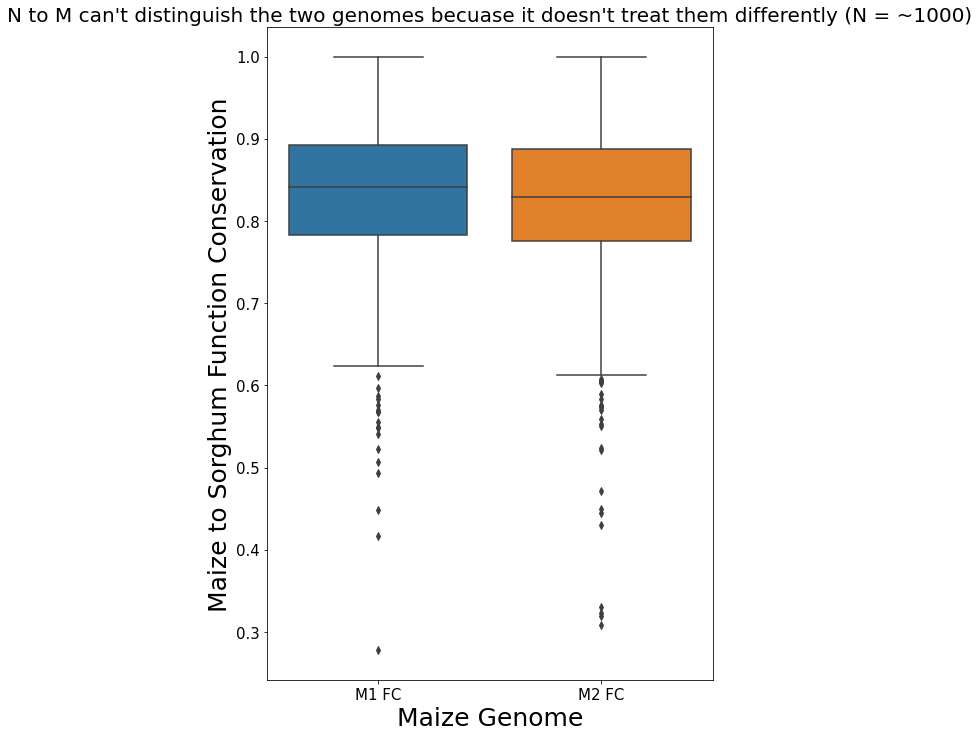

In [15]:
fig, ax = plt.subplots(figsize=(8, 12))
sns.boxplot(data=melted_both_genes, x='variable', y='value')
plt.ylabel("Maize to Sorghum Function Conservation", fontsize=25)
plt.xlabel("Maize Genome", fontsize=25)
plt.title(
    "N to M can't distinguish the two genomes becuase it doesn't treat them differently (N = ~1000)",
    fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

Text(0, 0.5, 'Maize to Sorghum Function Conservation')

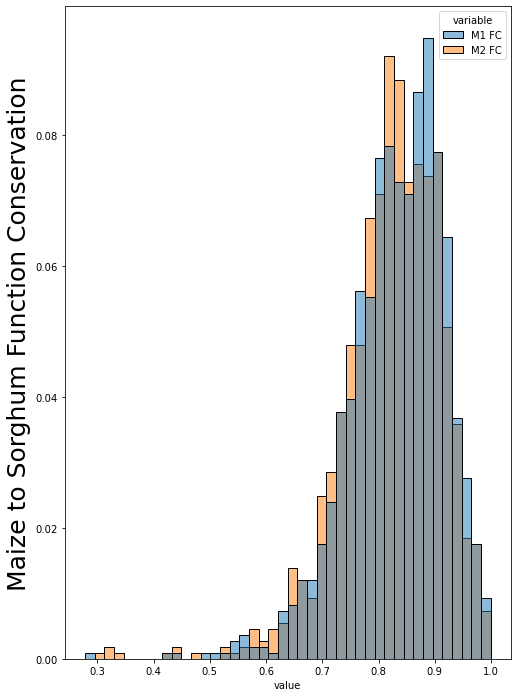

In [16]:
fig = plt.subplots(figsize=(8, 12))
sns.histplot(data=melted_both_genes,
             x='value',
             hue='variable',
             stat='probability',
             common_norm=False)
plt.ylabel("Maize to Sorghum Function Conservation", fontsize=25)

In [1]:
melted_both_genes_sc = pd.melt(id_vars='GeneSymbol',
                               frame=sorg_maize_fc_table_both_genes_present[[
                                   'GeneSymbol', 'M1 SC', 'M2 SC'
                               ]])
fig, ax = plt.subplots(figsize=(8, 12))
sns.boxplot(data=melted_both_genes_sc, x='variable', y='value')
plt.ylabel("Maize to Sorghum Specificity", fontsize=25)
plt.xlabel("Maize Genome", fontsize=25)
#plt.title("N to M can't distinguish the two genomes becuase it doesn't treat them differently (N = ~1000)", fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

NameError: name 'pd' is not defined

In [18]:
statistic, pval = scipy.stats.mannwhitneyu(
    x=sorg_maize_fc_table_both_genes_present['M1 FC'],
    y=sorg_maize_fc_table_both_genes_present['M2 FC'],
    alternative='two-sided')
pval

0.014117573012420843

In [19]:
plt.boxplot([
    m1_sorg_merged_pairs['fc'].to_list(), m2_sorg_merged_pairs['fc'].to_list()
])

KeyError: 'fc'

In [ ]:
def get_fc_sc_btw_two_species_with_gene_list(
        species_1, species_2, list_of_genes_in_species_1_as_panda):
    import pandas as pd
    import numpy as np
    import Name_resolver as nr

    #Convert Taxa to common names if NCBI taxa ID
    #Set up variable
    scientific_1 = nr.species_name_resolver(species_1,
                                            desired_type='scientific')
    scientific_2 = nr.species_name_resolver(species_2, desire_type='scientific')

    if species_1 == species_2:
        raise NameError("Species are the Same, submit different species")

    # Get Path for Orthologs
    path_to_orthologs_mapped_pd = pd.read_csv(
        '/data/passala/Generated_Tables/Reference_tables/mapping_paths_for_fc_scores.csv',
        index_col=0)
    path_to_orthologs = path_to_orthologs_mapped_pd.loc[scientific_1,
                                                        scientific_2]

    ortholog_map = pd.read_csv(path_to_orthologs)
    file_name = path_to_orthologs.split('/')[-1]
    file_name = file_name.split('_')
    if file_name[0] == species_1:
        list_of_genes_in_species_1_as_panda = list_of_genes_in_species_1_as_panda.rename(
            columns={
                list_of_genes_in_species_1_as_panda.columns[0]: 'sp1_gene'
            })
        fc_sc_map = list_of_genes_in_species_1_as_panda.merge(ortholog_map,
                                                              on='sp1_gene',
                                                              how='left')
        fc_sc_map.dropna(inplace=True)
    if file_name[1] == species_1:
        list_of_genes_in_species_1_as_panda = list_of_genes_in_species_1_as_panda.rename(
            columns={
                list_of_genes_in_species_1_as_panda.columns[0]: 'sp2_gene'
            })
        fc_sc_map = list_of_genes_in_species_1_as_panda.merge(ortholog_map,
                                                              on='sp2_gene',
                                                              how='left')
        fc_sc_map.dropna(inplace=True)
    # return fc_sc_map,species_name
    return fc_sc_map

In [ ]:
tester_1 = nr.species_name_resolver('sorghum', desired_type='scientific')
tester_2 = nr.species_name_resolver('maize', desired_type='scientific')

# Get Path for Orthologs
mapper_for_fc = pd.read_csv(
    '/data/passala/Generated_Tables/Reference_tables/mapping_paths_for_fc_scores.csv',
    index_col=0)
sorg_maize_fc_sc = mapper_for_fc.loc[tester_1, tester_2]

In [ ]:
sorg_maize_fc_sc

'/data/suresh/species/CoCoCoNet2/scoresN-M/sorghum_maize_prio_NM.csv'